In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data = df.rename(columns={'v1': 'Category', 'v2': 'Message'})

In [3]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

In [4]:
data = data.drop_duplicates()
data['Category'].value_counts()
data #done with preprocessing

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [5]:
X = data['Message']
Y = data['Category']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase = True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

## Logistic Regression

In [13]:
lr = LogisticRegression()
lr.fit(X_train_features, Y_train)


lr_train = lr.predict(X_train_features)
lr_test = lr.predict(X_test_features)

        
lr_train_acc = accuracy_score(Y_train, lr_train)
lr_test_acc = accuracy_score(Y_test, lr_test)


lr_precision = precision_score(Y_test, lr_test)
lr_recall = recall_score(Y_test, lr_test)
lr_f1 = f1_score(Y_test, lr_test)

lr_train_prob = lr.predict_proba(X_train_features)[:,1]
lr_test_prob = lr.predict_proba(X_test_features)[:,1]

lr_train_auc = roc_auc_score(Y_train, lr_train_prob)
lr_test_auc = roc_auc_score(Y_test, lr_test_prob)

print("Logistic Regression:\n")
print("Training Data Accuracy:", lr_train_acc)
print("Testing Data Accuracy :", lr_test_acc)

print("Precision             :", lr_precision)
print("Recall                :", lr_recall)
print("F1 Score              :", lr_f1)

print("Training Data AUC     :", lr_train_auc)
print("Testing Data AUC      :", lr_test_auc)

Logistic Regression:

Training Data Accuracy: 0.9613059250302297
Testing Data Accuracy : 0.9642166344294004
Precision             : 0.9620390455531453
Recall                : 0.9977502812148481
F1 Score              : 0.9795692987299834
Training Data AUC     : 0.998227423805275
Testing Data AUC      : 0.9947015243784182


## Decision Trees

In [11]:
dtrees = DecisionTreeClassifier()
dtrees.fit(X_train_features, Y_train)


dt_train = dtrees.predict(X_train_features)
dt_test = dtrees.predict(X_test_features)


dt_train_acc = accuracy_score(Y_train, dt_train)
dt_test_acc = accuracy_score(Y_test, dt_test)


dt_precision = precision_score(Y_test, dt_test)
dt_recall = recall_score(Y_test, dt_test)
dt_f1 = f1_score(Y_test, dt_test)

dt_train_prob = dtrees.predict_proba(X_train_features)[:,1]
dt_test_prob = dtrees.predict_proba(X_test_features)[:,1]

dt_train_auc = roc_auc_score(Y_train, dt_train_prob)
dt_test_auc = roc_auc_score(Y_test, dt_test_prob)

print("Decision Tress:\n")
print("Training Data Accuracy:", dt_train_acc)
print("Testing Data Accuracy :", dt_test_acc)

print("Precision             :", dt_precision)
print("Recall                :", dt_recall)
print("F1 Score              :", dt_f1)

print("Training Data AUC     :", dt_train_auc)
print("Testing Data AUC      :", dt_test_auc)

Decision Tress:

Training Data Accuracy: 1.0
Testing Data Accuracy : 0.9661508704061895
Precision             : 0.9776286353467561
Recall                : 0.983127109111361
F1 Score              : 0.9803701626472238
Training Data AUC     : 1.0
Testing Data AUC      : 0.9225980373143011


## K Nearest Neighbors

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train_features, Y_train)


knn_train = knn.predict(X_train_features)
knn_test = knn.predict(X_test_features)


knn_train_acc = accuracy_score(Y_train, knn_train)
knn_test_acc = accuracy_score(Y_test, knn_test)


knn_precision = precision_score(Y_test, knn_test)
knn_recall = recall_score(Y_test, knn_test)
knn_f1 = f1_score(Y_test, knn_test)

knn_train_prob = knn.predict_proba(X_train_features)[:,1]
knn_test_prob = knn.predict_proba(X_test_features)[:,1]

knn_train_auc = roc_auc_score(Y_train, knn_train_prob)
knn_test_auc = roc_auc_score(Y_test, knn_test_prob)

print("K Nearest Neighbors:\n")
print("Training Data Accuracy:", knn_train_acc)
print("Testing Data Accuracy :", knn_test_acc)

print("Precision             :", knn_precision)
print("Recall                :", knn_recall)
print("F1 Score              :", knn_f1)

print("Training Data AUC     :", knn_train_auc)
print("Testing Data AUC      :", knn_test_auc)

K Nearest Neighbors:

Training Data Accuracy: 0.9143893591293834
Testing Data Accuracy : 0.8974854932301741
Precision             : 0.893467336683417
Recall                : 1.0
F1 Score              : 0.9437367303609342
Training Data AUC     : 0.9999308011436535
Testing Data AUC      : 0.7820449167991932


## Random Forest

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train_features, Y_train)


rf_train = rf.predict(X_train_features)
rf_test = rf.predict(X_test_features)


rf_train_acc = accuracy_score(Y_train, rf_train)
rf_test_acc = accuracy_score(Y_test, rf_test)


rf_precision = precision_score(Y_test, rf_test)
rf_recall = recall_score(Y_test, rf_test)
rf_f1 = f1_score(Y_test, rf_test)

rf_train_prob = rf.predict_proba(X_train_features)[:,1]
rf_test_prob = rf.predict_proba(X_test_features)[:,1]

rf_train_auc = roc_auc_score(Y_train, rf_train_prob)
rf_test_auc = roc_auc_score(Y_test, rf_test_prob)


print("Random Forest:\n")
print("Training Data Accuracy:", rf_train_acc)
print("Testing Data Accuracy :", rf_test_acc)   
           
print("Precision             :", rf_precision)
print("Recall                :", rf_recall)
print("F1 Score              :", rf_f1)

print("Training Data AUC     :", rf_train_auc)
print("Testing Data AUC      :", rf_test_auc)

Random Forest:

Training Data Accuracy: 1.0
Testing Data Accuracy : 0.9738878143133463
Precision             : 0.9705240174672489
Recall                : 1.0
F1 Score              : 0.9850415512465374
Training Data AUC     : 1.0
Testing Data AUC      : 0.9936270897172336


## Stacking Model

In [32]:
estimators = [ ('lr', lr), ('dtree', dtrees), ('knn', knn), ('rf', rf) ]
stack = StackingClassifier(estimators, final_estimator = lr)
stack.fit(X_train_features, Y_train)


stack_train = stack.predict(X_train_features)
stack_test = stack.predict(X_test_features)


stack_train_acc = accuracy_score(Y_train, stack_train)
stack_test_acc = accuracy_score(Y_test, stack_test)


stack_precision = precision_score(Y_test, stack_test)
stack_recall = recall_score(Y_test, stack_test)
stack_f1 = f1_score(Y_test, stack_test)

stack_train_prob = stack.predict_proba(X_train_features)[:,1]
stack_test_prob = stack.predict_proba(X_test_features)[:,1]

stack_train_auc = roc_auc_score(Y_train, stack_train_prob)
stack_test_auc = roc_auc_score(Y_test, stack_test_prob)


print("Stacking Classifier:\n")
print("Training Data Accuracy:", stack_train_acc)
print("Testing Data Accuracy :", stack_test_acc)   
           
print("Precision             :", stack_precision)
print("Recall                :", stack_recall)
print("F1 Score              :", stack_f1)

print("Training Data AUC     :", stack_train_auc)
print("Testing Data AUC      :", stack_test_auc)

Stacking Classifier:

Training Data Accuracy: 1.0
Testing Data Accuracy : 0.9825918762088974
Precision             : 0.9855072463768116
Recall                : 0.9943757030371203
F1 Score              : 0.9899216125419933
Training Data AUC     : 1.0
Testing Data AUC      : 0.9963694193398239


In [53]:
misclassified_test_indices = [i for i, (pred, actual) in enumerate(zip(stack_test, Y_test)) if pred != actual]

total_misclassified = len(misclassified_test_indices)
print("Total misclassified emails:", total_misclassified)

misclassified_spam = 0
misclassified_ham = 0

for pred, true in zip(stack_test, Y_test):
    if pred != true:
        if true == 0:
            misclassified_spam += 1
        else:
            misclassified_ham += 1

print("Misclassified Spam:", misclassified_spam)
print("Misclassified Ham:", misclassified_ham)
print()

for i in misclassified_test_indices:
    print("Email content:", X_test.iloc[i])
    print("Predicted label:", stack_test[i])
    print("Actual label:", Y_test.iloc[i])
    print("Probability of being ham:", stack_test_prob[i])
    print()

Total misclassified emails: 18
Misclassified Spam: 13
Misclassified Ham: 5

Email content: RCT' THNQ Adrian for U text. Rgds Vatian
Predicted label: 1
Actual label: 0
Probability of being ham: 0.971120111208681

Email content: K.:)do it at evening da:)urgent:)
Predicted label: 0
Actual label: 1
Probability of being ham: 0.4534426350272988

Email content: Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123
Predicted label: 1
Actual label: 0
Probability of being ham: 0.9844836031135243

Email content: Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
Predicted label: 1
Actual label: 0
Probability of being ham: 0.5166654529628777

Email content: Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Predicted label: 1
Actual label: 0
Probability of being ham: 0.9296558383283042

Email conte

In [52]:
from sklearn.metrics import confusion_matrix

conf_matrix_test = confusion_matrix(Y_test, stack_test)
print("\nConfusion matrix for test set:")
print(conf_matrix_test)



Confusion matrix for test set:
[[132  13]
 [  5 884]]


## Visualization

In [22]:
train_acc_list = {"LR":lr_train_acc,
                  "DT":dt_train_acc,
                  "KNN":knn_train_acc,
                  "RF":rf_train_acc,
                  "STACK":stack_train_acc}

test_acc_list = {"LR":lr_test_acc,
                  "DT":dt_test_acc,
                  "KNN":knn_test_acc,
                  "RF":rf_test_acc,
                  "STACK":stack_test_acc}

precision_list = {"LR":lr_precision,
                  "DT":dt_precision,
                  "KNN":knn_precision,
                  "RF":rf_precision,
                  "STACK":stack_precision}

recall_list = {"LR":lr_recall,
               "DT":dt_recall,
               "KNN":knn_recall,
               "RF":rf_recall,
               "STACK":stack_recall}

f1_list = {"LR":lr_f1,
               "DT":dt_f1,
               "KNN":knn_f1,
               "RF":rf_f1,
               "STACK":stack_f1}

train_auc_list = {"LR":lr_train_auc,
                    "DT":dt_train_auc,
                    "KNN":knn_train_auc,
                    "RF":rf_train_auc,
                    "STACK":stack_train_auc}

test_auc_list = {"LR":lr_test_auc,
                    "DT":dt_test_auc,
                    "KNN":knn_test_auc,
                    "RF":rf_test_auc,
                    "STACK":stack_test_auc}

In [23]:
a1 =  pd.DataFrame.from_dict(train_acc_list, orient = 'index', columns = ["Traning Accuracy"])
a2 =  pd.DataFrame.from_dict(test_acc_list, orient = 'index', columns = ["Testing Accuracy"])
a3 =  pd.DataFrame.from_dict(precision_list, orient = 'index', columns = ["Precision Score"])
a4 =  pd.DataFrame.from_dict(recall_list, orient = 'index', columns = ["Recall Score"])
a5 =  pd.DataFrame.from_dict(f1_list, orient = 'index', columns = ["F1 Score"])
a6 =  pd.DataFrame.from_dict(train_auc_list, orient = 'index', columns = ["Training AUC"])
a7 =  pd.DataFrame.from_dict(test_auc_list, orient = 'index', columns = ["Testing AUC"])

org = pd.concat([a1, a2, a3, a4, a5, a6, a7], axis = 1)
org

,Traning Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score,Training AUC,Testing AUC
LR,0.961306,0.964217,0.962039,0.997750,0.979569,0.998227,0.994702
DT,1.000000,0.966151,0.977629,0.983127,0.980370,1.000000,0.922598
KNN,0.914389,0.897485,0.893467,1.000000,0.943737,0.999931,0.782045
RF,1.000000,0.973888,0.970524,1.000000,0.985042,1.000000,0.993627
STACK,1.000000,0.984526,0.985539,0.996625,0.991051,1.000000,0.997106


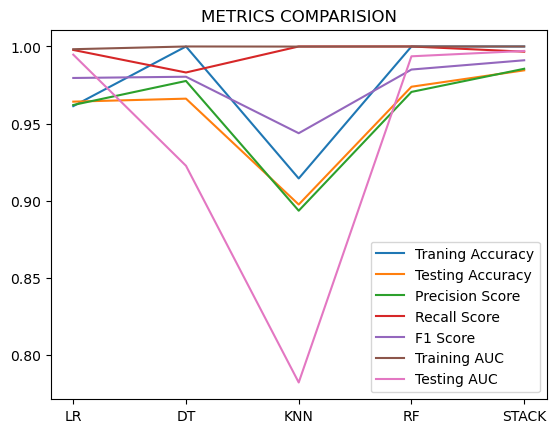

In [25]:
#with auc

alg = ['LR','DT','KNN','RF','STACK']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
plt.plot(alg,a5)
plt.plot(alg,a6)
plt.plot(alg,a7)
legend = ['Traning Accuracy', 'Testing Accuracy', 'Precision Score', 'Recall Score', 'F1 Score', 'Training AUC', 'Testing AUC']
plt.title("METRICS COMPARISION")
plt.legend(legend)
plt.show()

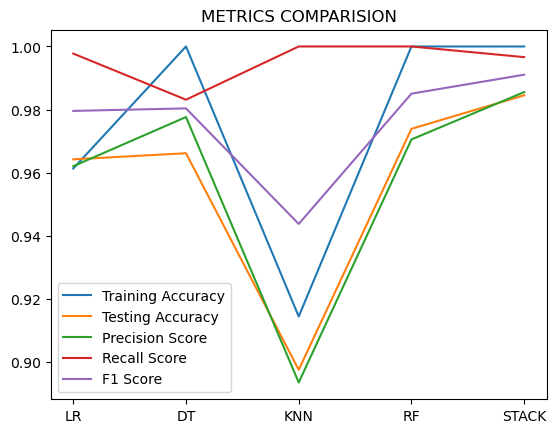

In [29]:
alg = ['LR','DT','KNN','RF','STACK']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
plt.plot(alg,a5)
legend = ['Training Accuracy', 'Testing Accuracy', 'Precision Score', 'Recall Score', 'F1 Score']
plt.title("METRICS COMPARISION")
plt.legend(legend)
plt.show()

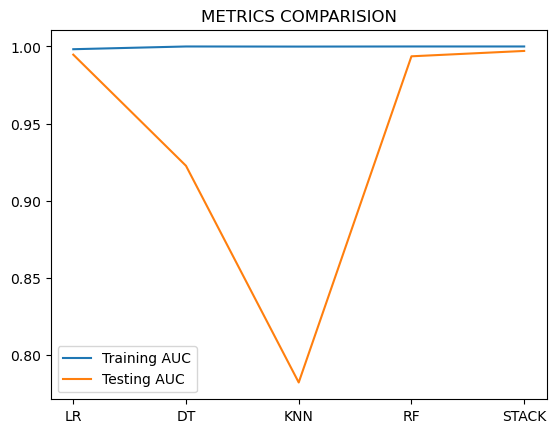

In [27]:
alg = ['LR','DT','KNN','RF','STACK']
plt.plot(alg,a6)
plt.plot(alg,a7)
legend = ['Training AUC', 'Testing AUC']
plt.title("METRICS COMPARISION")
plt.legend(legend)
plt.show()

In [31]:
print("Testing Data AUC      :", stack_test_auc)

Testing Data AUC      : 0.9963849346417905


## Dropping KNN from stacking model

In [30]:
estimators = [ ('lr', lr), ('dtree', dtrees), ('rf', rf) ]
stack2 = StackingClassifier(estimators, final_estimator = lr)
stack2.fit(X_train_features, Y_train)


stack_train = stack2.predict(X_train_features)
stack_test = stack2.predict(X_test_features)


stack_train_acc = accuracy_score(Y_train, stack_train)
stack_test_acc = accuracy_score(Y_test, stack_test)


stack_precision = precision_score(Y_test, stack_test)
stack_recall = recall_score(Y_test, stack_test)
stack_f1 = f1_score(Y_test, stack_test)

stack_train_prob = stack2.predict_proba(X_train_features)[:,1]
stack_test_prob = stack2.predict_proba(X_test_features)[:,1]

stack_train_auc = roc_auc_score(Y_train, stack_train_prob)
stack_test_auc = roc_auc_score(Y_test, stack_test_prob)


print("Stacking Classifier:\n")
print("Training Data Accuracy:", stack_train_acc)
print("Testing Data Accuracy :", stack_test_acc)   
           
print("Precision             :", stack_precision)
print("Recall                :", stack_recall)
print("F1 Score              :", stack_f1)

print("Training Data AUC     :", stack_train_auc)
print("Testing Data AUC      :", stack_test_auc)

# results were worse when KNN was dropped

Stacking Classifier:

Training Data Accuracy: 1.0
Testing Data Accuracy : 0.9816247582205029
Precision             : 0.9865771812080537
Recall                : 0.9921259842519685
F1 Score              : 0.9893438025799215
Training Data AUC     : 1.0
Testing Data AUC      : 0.9963849346417905
